In [158]:
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
from textwrap import wrap
from math import floor, log10
%matplotlib inline
mpl.rcParams['font.serif'] ="Cambria"
mpl.rcParams['font.family'] ="serif"
mpl.rcParams['font.size']="16"

In [159]:
round_to_n = lambda x, n: round(x, -int(floor(log10(x))) + (n - 1)) 

# Base case design

In [275]:
Ns = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Ps = [129.52, 129.59, 129.67, 129.75, 129.83, 129.91, 130.00, 129.91, 129.83, 129.74, 129.65, 129.57, 129.48, 129.39, 129.31, 129.22, 129.13, 129.05, 128.96, 128.87, 128.79, 128.70, 128.62, 128.53, 128.44, 128.34, 128.22, 128.11, 127.99]
Ds = [0.1638, 0.1638, 0.1627, 0.1612, 0.1589, 0.1548, 0.1474, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1536, 0.1535, 0.1531, 0.1512, 0.1441, 0.1322, 0.1248, 0.1236]

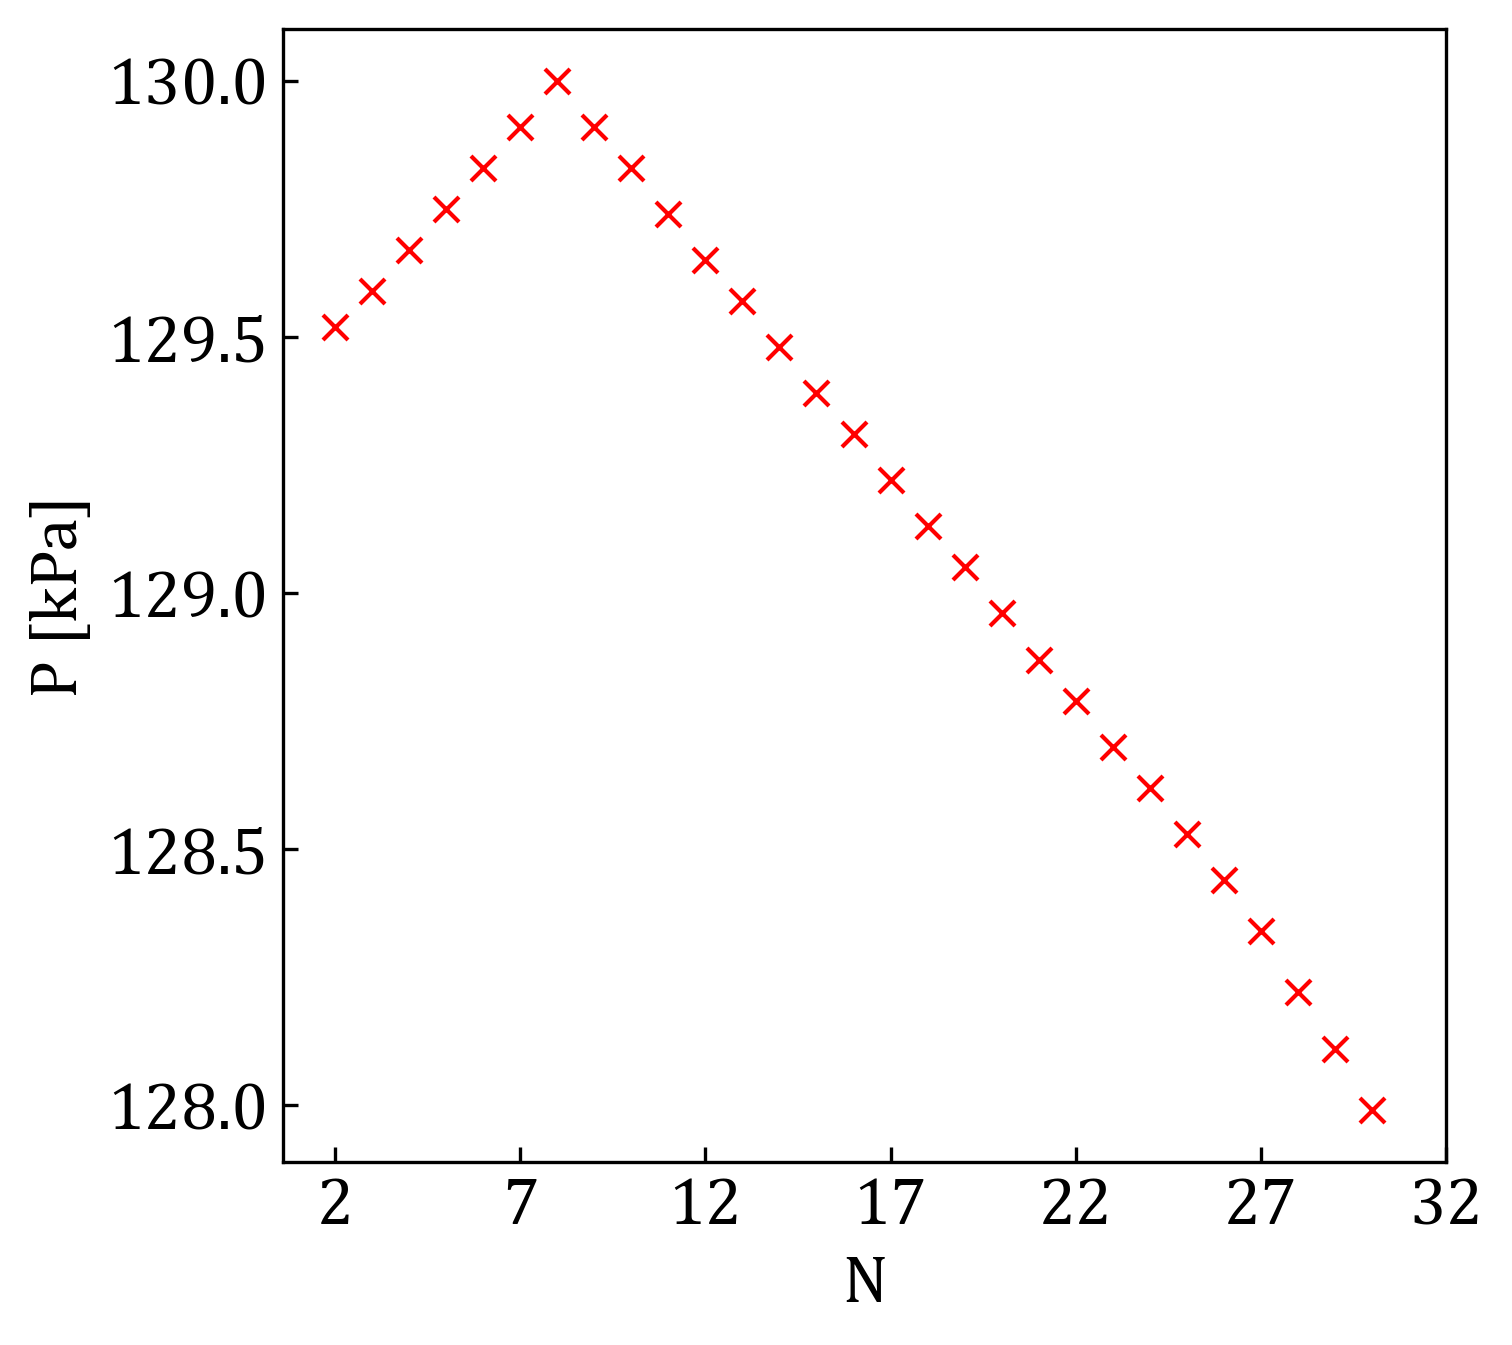

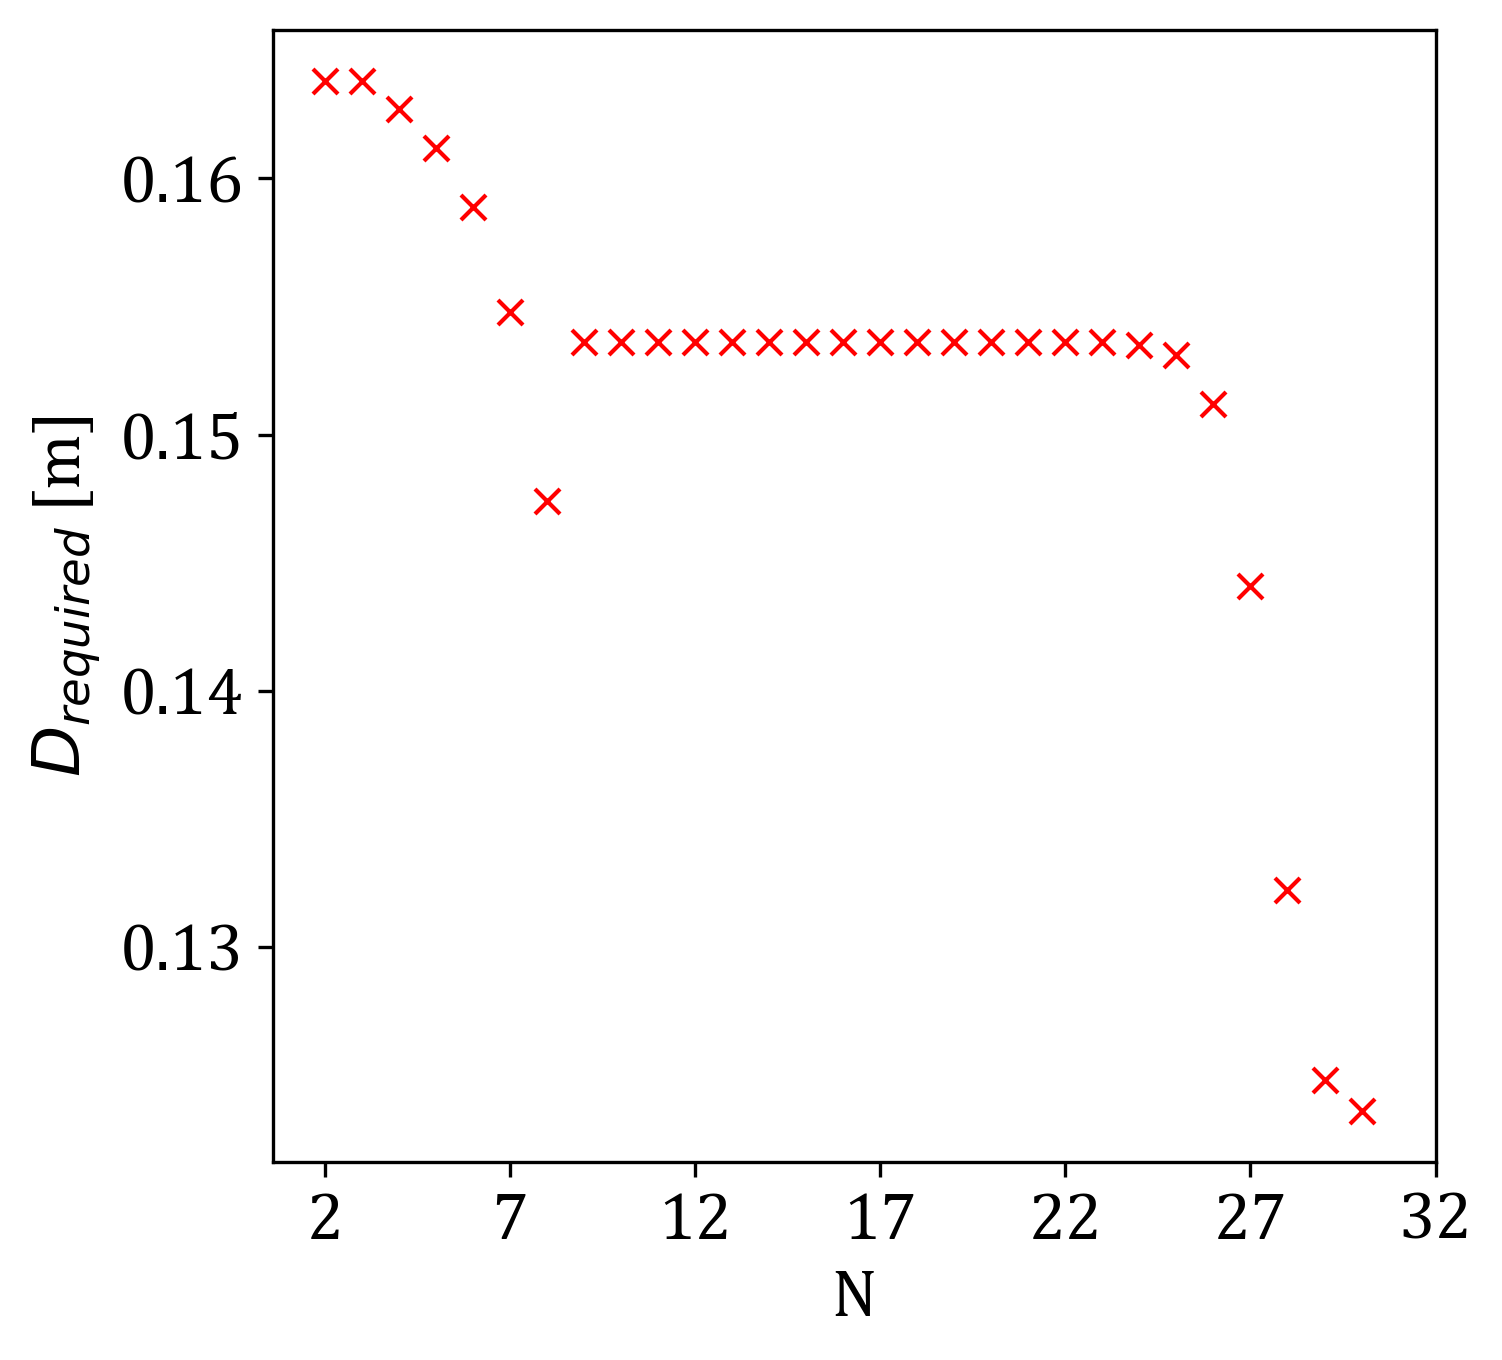

In [291]:
def plot_base_case():
    plt.figure(dpi=300, figsize=(5, 5))
    plt.plot(Ns, Ps, 'rx')
    #plt.xlim(xmax=len(Ns) + 2)
    #plt.ylim(ymin=0)
    plt.xticks(np.arange(2, 35, 5))
    plt.xlabel('N')
    plt.ylabel('P [kPa]')
    plt.tick_params(direction='in')
    plt.tick_params(axis='x', which='minor', bottom=False, length=2)
    #ax.tick_params(axis='x', which='minor', bottom=False)
    plt.savefig('base_case_P.png', bbox_inches='tight')
    
    plt.figure(dpi=300, figsize=(5, 5))
    plt.plot(Ns, Ds, 'rx')
    plt.xlabel('N')
    plt.xticks(np.arange(2, 35, 5))
    plt.ylabel('$D_{required}$ [m]')
    plt.savefig('base_case_D.png', bbox_inches='tight')
plot_base_case()

# N optimisation
diameter incencitive

In [294]:
# Ns = [16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]
# Qrebs = [9268.35, 9268.41, 9268.59, 9269.17, 9271, 9276.78, 9294.75, 9348.9, 9501.1, 9881.98, 10721.3, 12450.4, 16178.5]
# xt_wats = [0.385759, 0.385763, 0.385777, 0.385821, 0.38596, 0.386397, 0.387755, 0.391808, 0.402924, 0.429066, 0.479396, 0.559596, 0.669628]

Ns = [12, 11, 10, 9, 8, 7, 6, 5, 4]
Qrebs = [9271, 9276.78, 9294.75, 9348.9, 9501.1, 9881.98, 10721.3, 12450.4, 16178.5]
xt_wats = [0.38596, 0.386397, 0.387755, 0.391808, 0.402924, 0.429066, 0.479396, 0.559596, 0.669628]

In [297]:
def plot_N_opt():
    plt.figure(dpi=300, figsize=(10, 5))
    plt.plot(Ns, Qrebs, 'rx')
    plt.xlim(xmax=len(Ns) + 2)
    #plt.ylim(ymin=0)
    plt.xticks([14, 13] + Ns)
    for i in range(len(Ns)):
        text = '$x_{wat_{D}} = $' + str(round(xt_wats[i], 3))
        if (i == len(Ns)-1):
            plt.text(Ns[i]+0.2, Qrebs[i], text, verticalalignment='center', fontsize=12)  
        else:
            plt.text(Ns[i]+0.1, Qrebs[i]+800, text, verticalalignment='center', rotation=45, fontsize=12)
    plt.xlabel('$N_{total}$')
    plt.ylabel('$Q_{reboiler}$ [W]')
    plt.tick_params(direction='in')
    plt.savefig('N_opt', bbox_inches='tight')

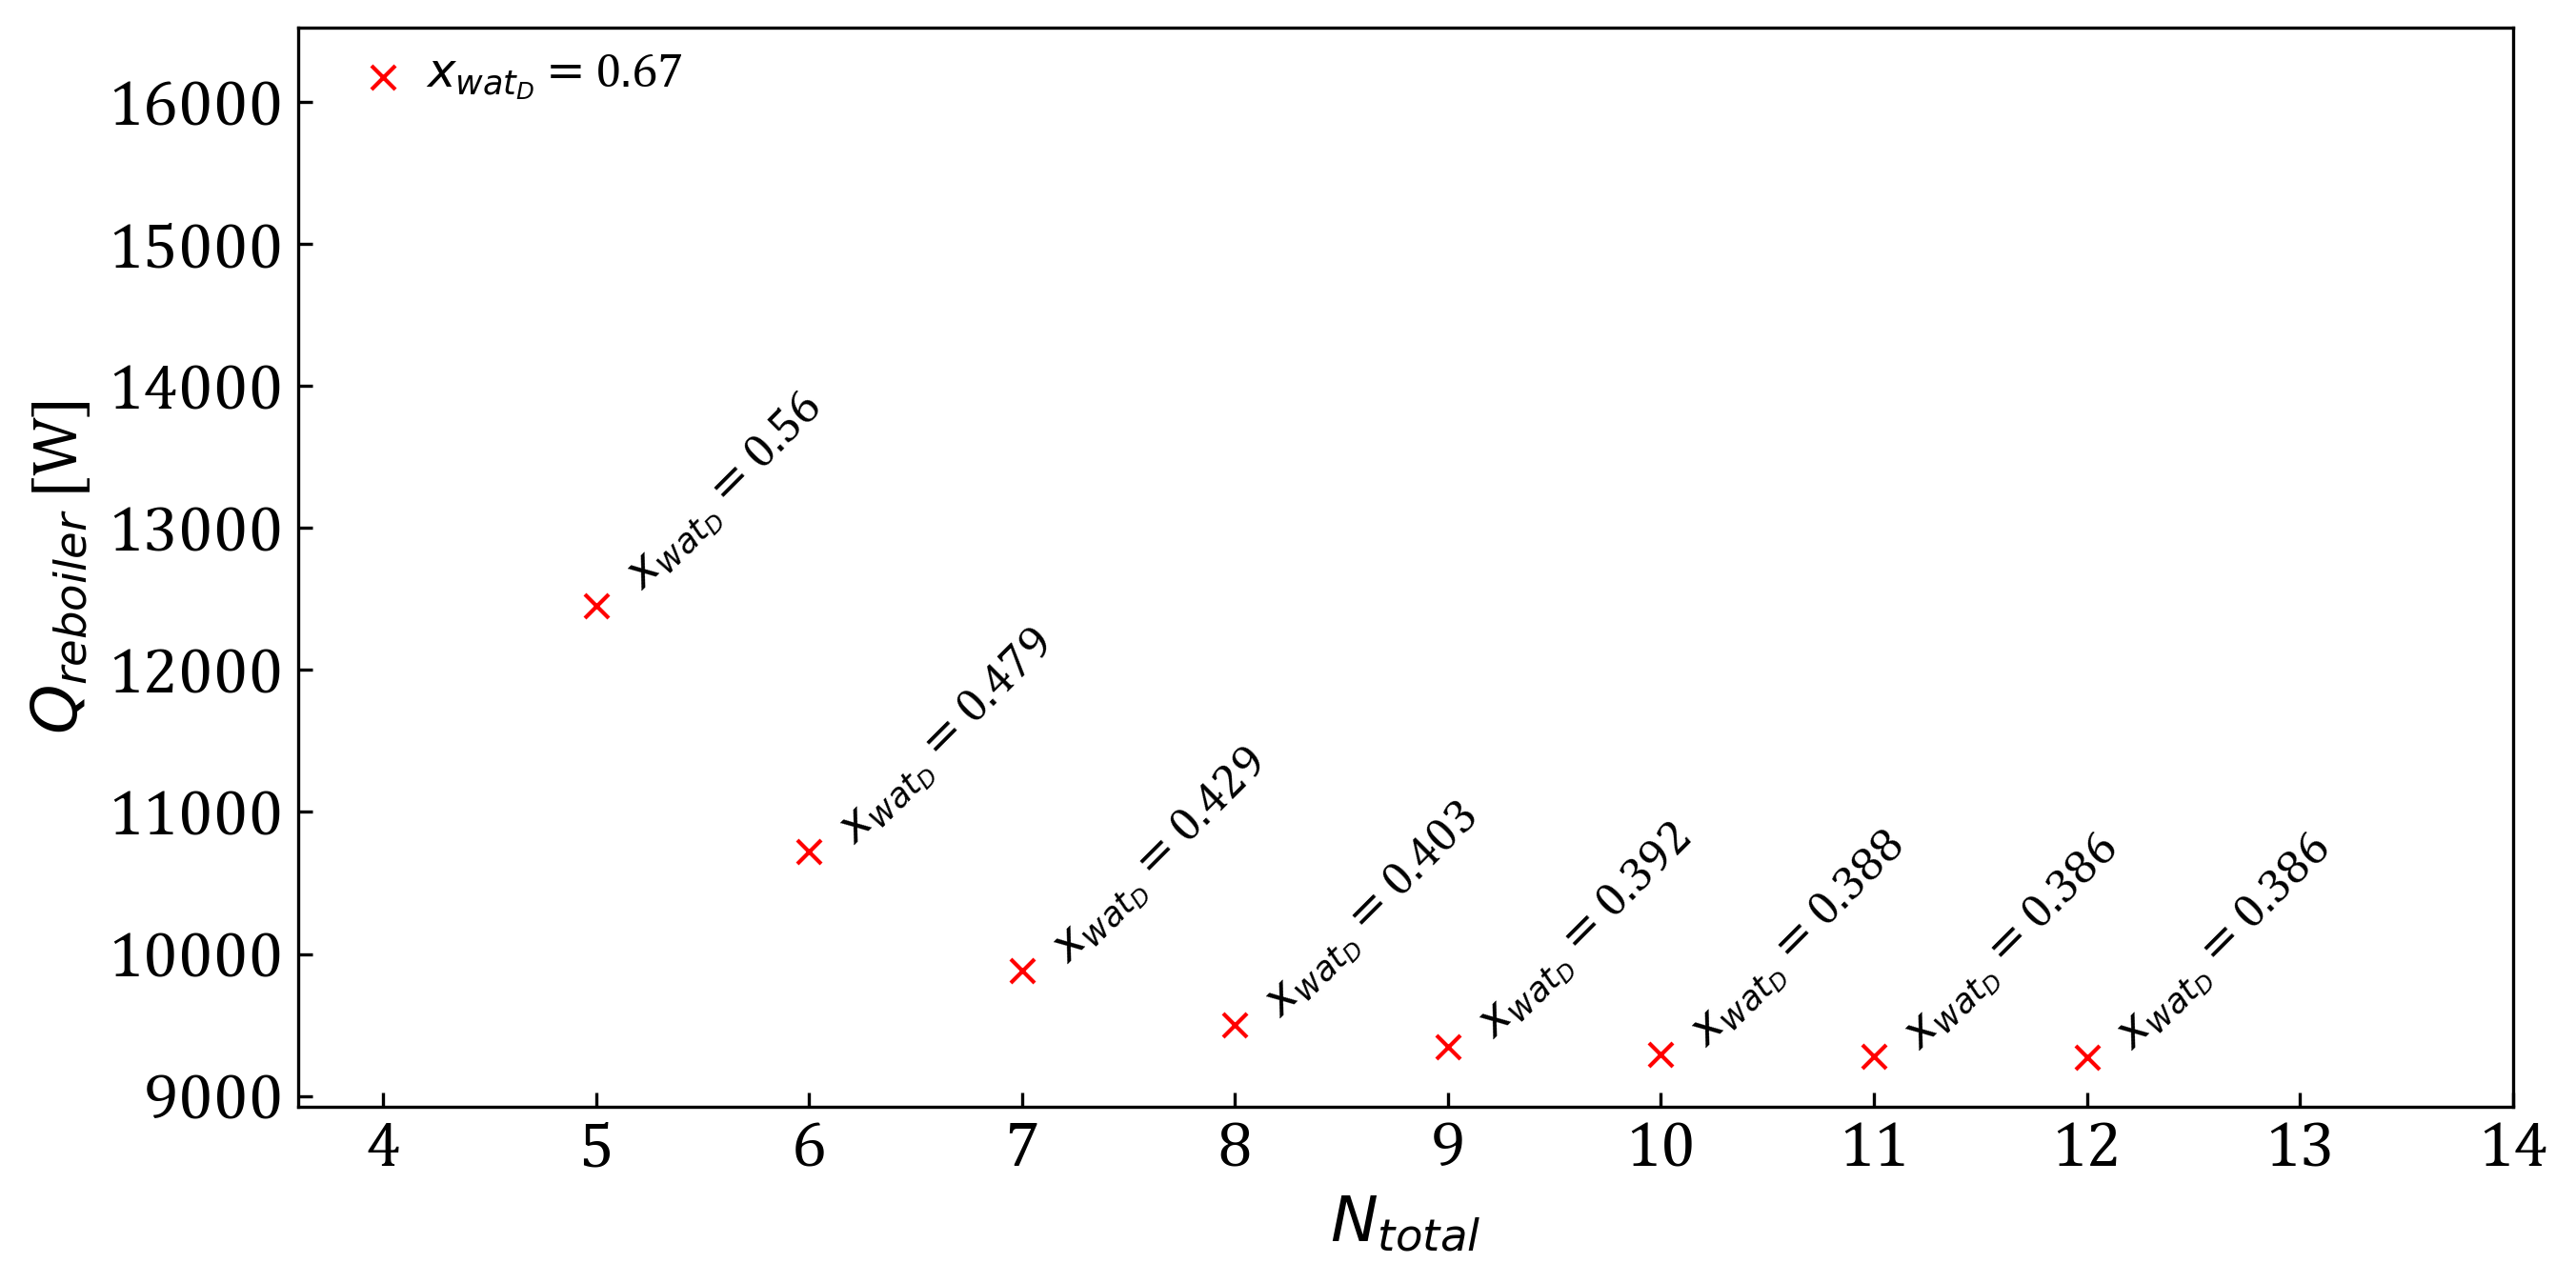

In [298]:
plot_N_opt()

In [62]:
np.arange(1, len(Ns)+2, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

# P optimisation
at N = 31

In [299]:
Ps = [1.3, 2.3, 3.3, 4.3, 5.3, 6.3]
Qrebs = [9268.32, 10733, 11763.1, 12583.3, 13274.5, 13877.2]
Ds = [0.0790, 0.0777, 0.0772, 0.0769, 0.0769, 0.0770]
xt_wats = [0.385757, 0.373393, 0.36794, 0.364911, 0.363036, 0.361795]

In [300]:
def plot_P_opt():
    plt.figure(dpi=300, figsize=(10, 5))
    plt.plot(Ps, Qrebs, 'rx')
    plt.xlim(xmax=len(Ps) + 1.3)
    #plt.ylim(ymin=0)
    #plt.xticks([14, 13] + Ns)
    for i in range(len(Ps)):
        text1 = '$x_{wat_{D}}} = $' + str(round(xt_wats[i], 3))
        #text2 = 'D = ' + str(round(Ds[i], 4))
        plt.text(Ps[i]+0.1, Qrebs[i], text1, verticalalignment='center', fontsize=12)
        #plt.text(Ps[i]+0.1, Qrebs[i]-300, text2, verticalalignment='center', fontsize=12)
    plt.xlabel('$P_i$ [bar]')
    plt.ylabel('$Q_{reboiler}$ [W]')
    plt.tick_params(direction='in')
    plt.savefig('P_opt', bbox_inches='tight')  

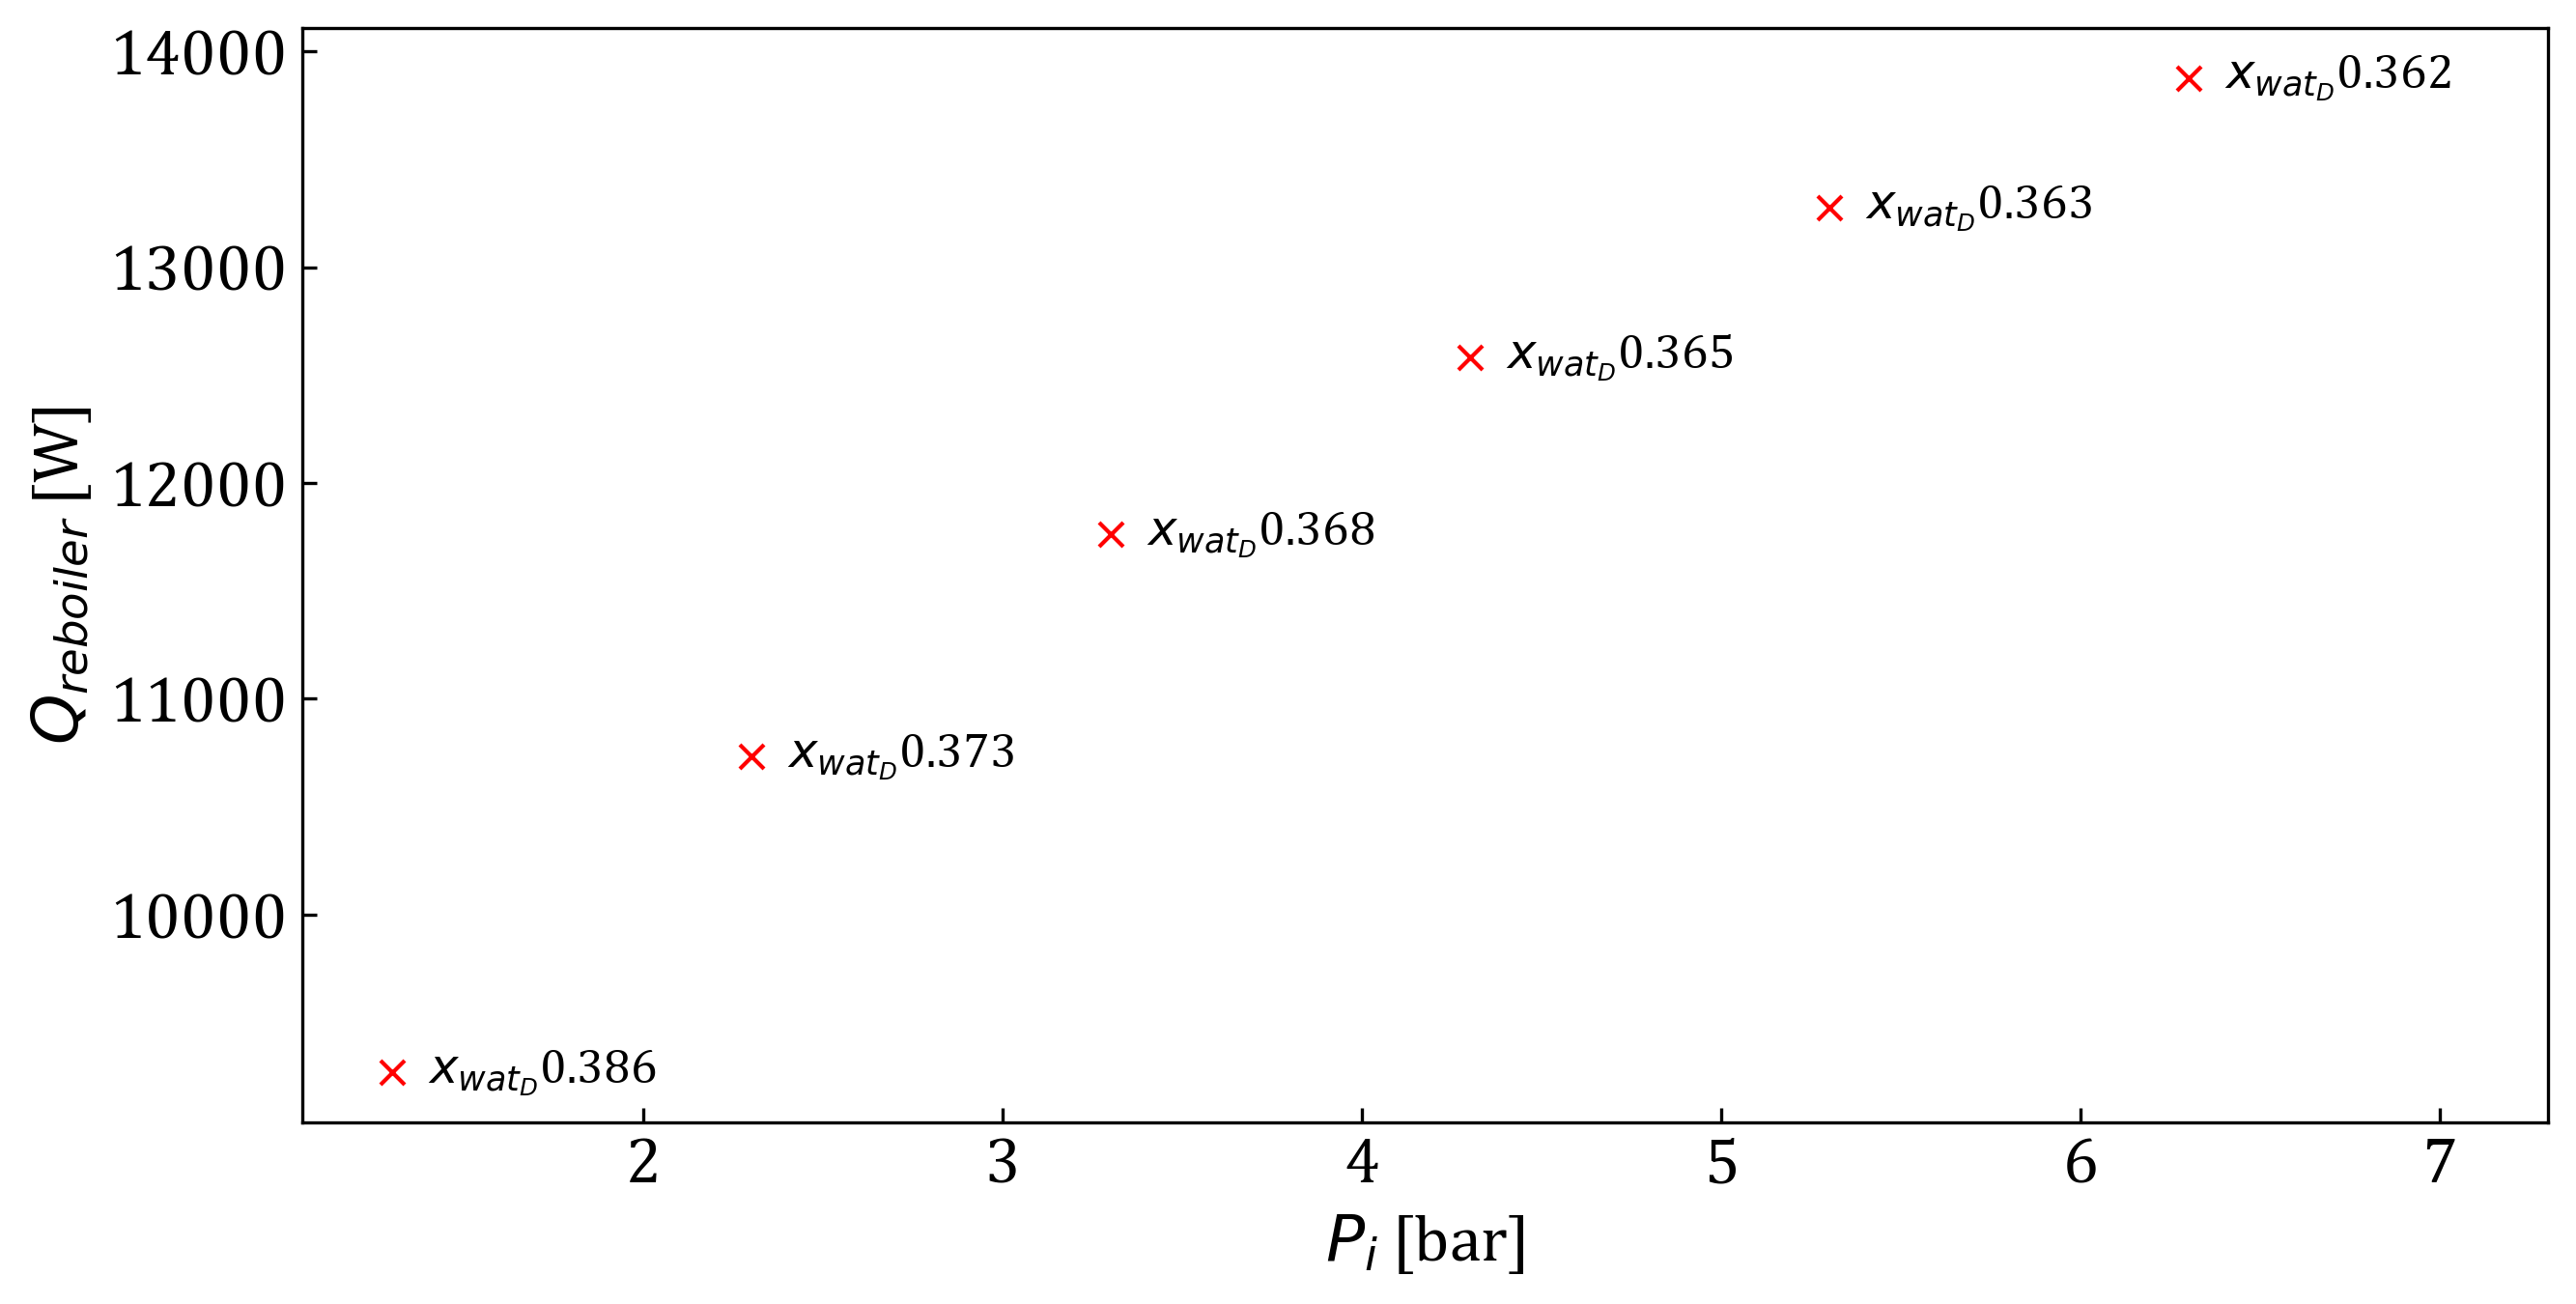

In [301]:
plot_P_opt()

# Packing optimisation

In [303]:
packings = ['16 mm metal Pall rings*', '#1 metal Nutter rings*', '13 mm ceramic Berl saddles*', '13 mm ceramic Intalox saddles*', '1Y Flexipac**', 'Sulzer BX wire mesh***', '2300 Hyperfil***']
hetps = [0.258333333, 0.553571429, 0.2, 0.149277689, 0.338095238, 0.303252033, 0.143478261]
#ΔPs = [60.62065389, 115.1398599, 52.31714927, 31.75987186, 83.10396037, 52.78798009, 38.47854701]
ΔPs = [234.6605957, 207.9945856, 261.5857464, 212.7569911, 245.8004462, 174.0729638, 268.1838125]


<ipython-input-305-1776c1a27864>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(packings, rotation=45)


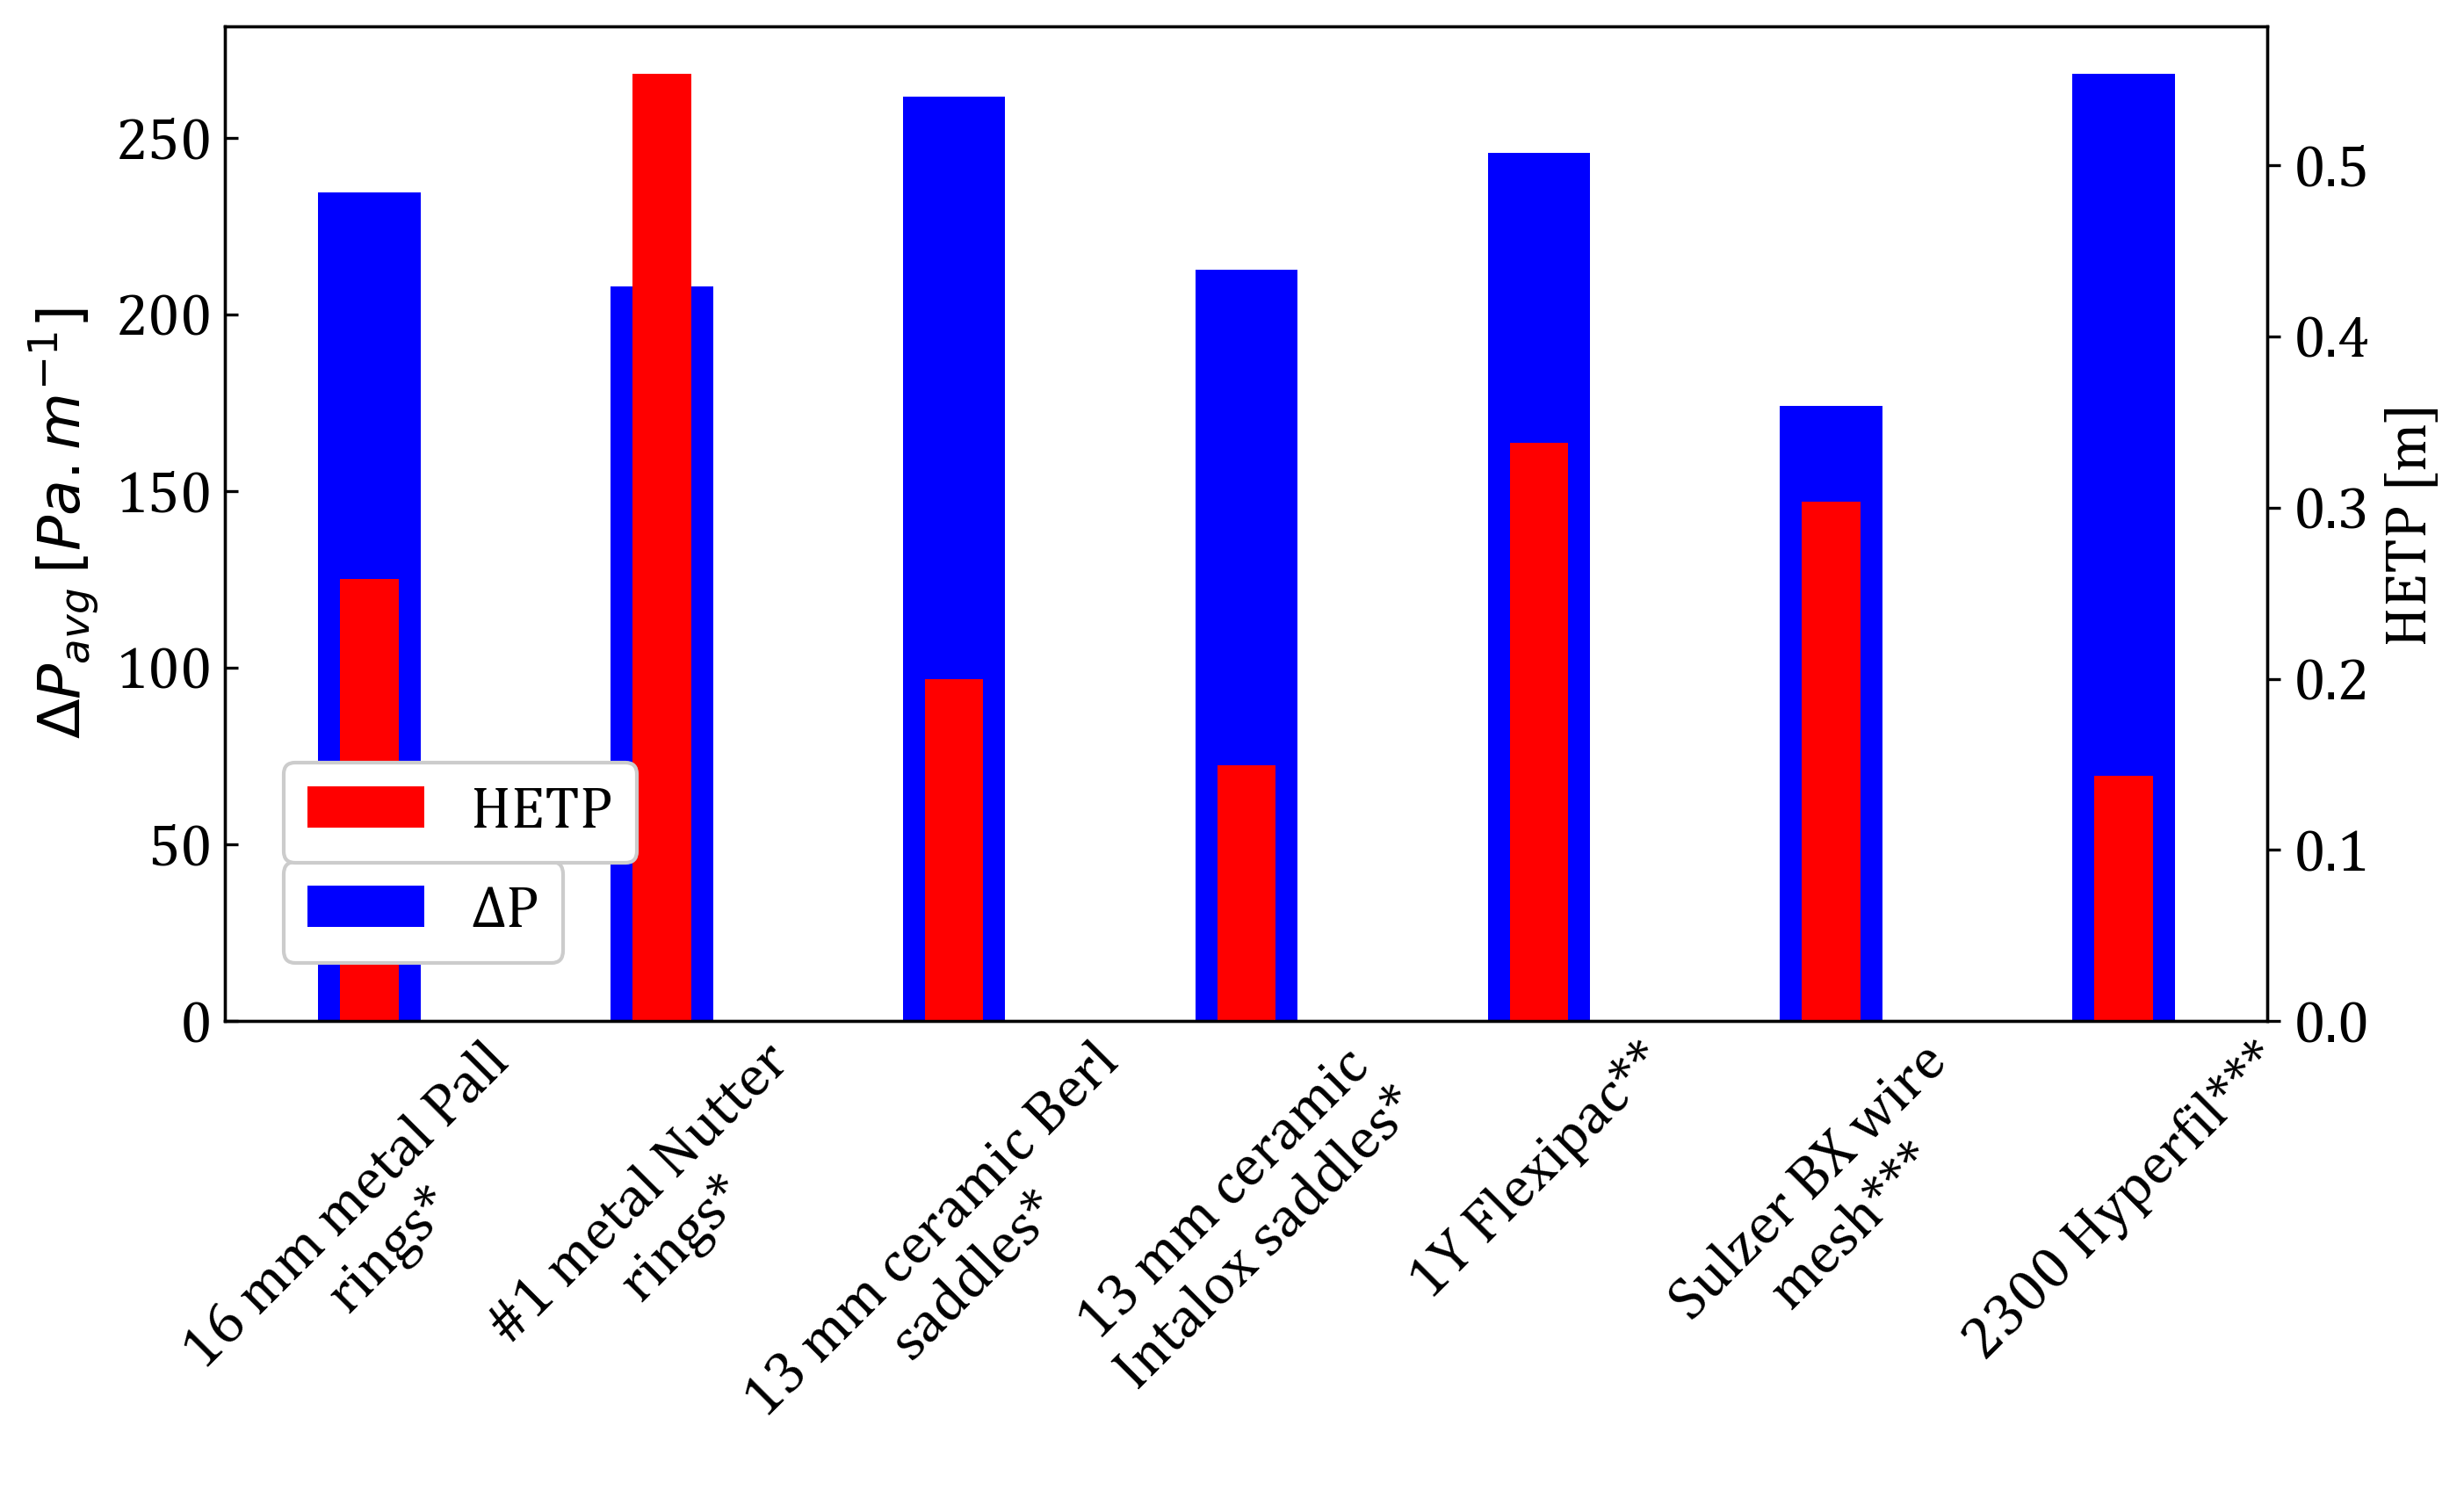

In [305]:
packings = [ '\n'.join(wrap(l, 20)) for l in packings]
def plot_packing_opt():
    fig = plt.figure(dpi=300, figsize=(10, 5))
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twinx()
    
    ax1.set_xticklabels(packings, rotation=45)
    ax1.bar(packings, ΔPs, color='b', width=0.35, label='ΔP')
    ax1.set_ylabel('$\Delta P_{avg}$ $[Pa.m^{-1}]$')
    ax2.bar(packings, hetps, color='r', width=0.2, label='HETP')
    ax2.set_ylabel('HETP [m]')
    
#     x = np.arange(len(packings))
#     ax1.set_xticklabels(packings, rotation=45)
#     ax1.bar(x-0.1, ΔPs, color='b', width=0.3, label='ΔP')
#     ax1.set_ylabel('$\Delta P_{avg}$ $[Pa.stage^{-1}]$')
#     ax2.bar(x+0.1, hetps, color='r', width=0.3, label='HETP')
#     ax2.set_ylabel('HETP [m]')
    
    legend_1 = ax1.legend(loc='lower left', bbox_to_anchor=(0,0), borderaxespad=1., framealpha=1)
    legend_1.remove()
    ax2.legend(loc='lower left', bbox_to_anchor=(0,0.1), borderaxespad=1., framealpha=1)
    ax2.add_artist(legend_1)
    
    ax1.tick_params(direction='in')
    plt.savefig('packing_opt.png', bbox_inches='tight')  
plot_packing_opt()

In [232]:
np.arange(len(packings))+1

array([1, 2, 3, 4, 5, 6, 7])

In [227]:
packings

['16 mm metal Pall\nrings*',
 '#1 metal Nutter\nrings*',
 '13 mm ceramic Berl\nsaddles*',
 '13 mm ceramic\nIntalox saddles*',
 '1Y Flexipac**',
 'Sulzer BX wire\nmesh***',
 '2300 Hyperfil***']